In [1]:
import numpy as np
import pandas as pd
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df1 = df.dropna(subset=['Global_Sales'])


In [4]:
publisher = df1.groupby('Publisher').sum('Global_Sales').sort_values(by=['Global_Sales'], ascending=False)
publisher.head()

,Rank,Year,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,
Nintendo,862888.0,885645.0,2388.7,311.6,825.10,445.87,446.41,100.27,1817.74
Activision,728437.0,507784.0,1003.5,94.8,310.48,177.07,6.94,62.06,556.44
Electronic Arts,952233.0,676501.0,1399.5,78.6,262.39,210.78,7.16,65.51,545.82
Sony Computer Entertainment,603494.0,449155.0,1048.6,201.2,203.83,148.06,49.45,67.20,468.62
EA Sports,731315.0,503665.0,867.3,9.1,222.66,138.87,2.86,51.42,415.78


(-0.5, 3839.5, 2159.5, -0.5)

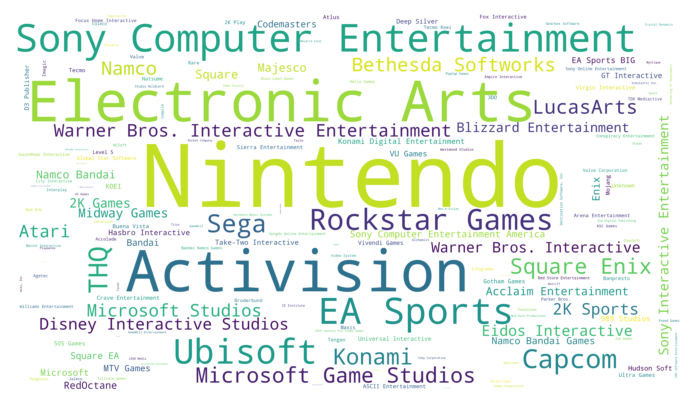

In [5]:
d = dict(zip(publisher.index, publisher.Global_Sales))
wordcloud = WordCloud(collocations=False,width=3840,height=2160,background_color="white").generate_from_frequencies(d).to_file('test.jpg')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [11]:
comments = pd.read_csv('metacritic_game_user_comments.csv')
# comments.shape
comments.head()

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA


In [49]:
words= []
with open('metacritic_game_user_comments.csv', 'rt') as csvfile:
    limit = 100000
    rows = 0
    reader = csv.reader(csvfile)
    next(reader)
    text=''
    for row in reader:
        if rows<limit:            
#             csv_words = row[4].split(" ")
#             for i in csv_words:
#                 words.append(i)
            text+=row[4]
            rows+=1
        else:
            break

# words_counted = []
# for i in words:
#     x = words.count(i)
#     words_counted.append((i,x))

In [50]:
# words_counted = dict(words_counted)
# words_counted

In [65]:
stopwords = set(STOPWORDS)
stopwords.update(['one', 'will', 'must', 'still', 'lot', 'many', 'much', 'even', 'now', 'always', 'without'])
# stopwords

(-0.5, 3839.5, 2159.5, -0.5)

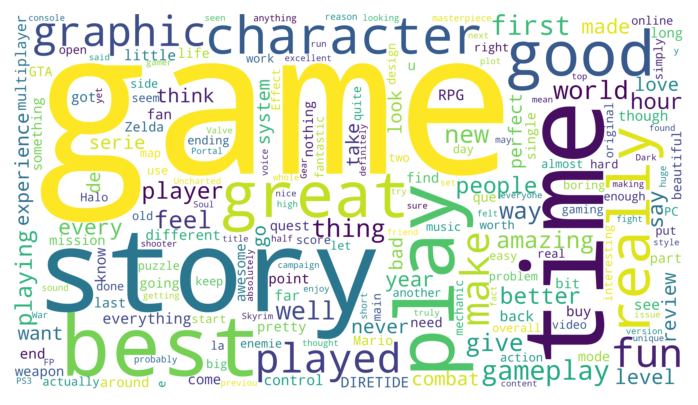

In [66]:
wordcloud = WordCloud(width=3840, height=2160, stopwords=stopwords, background_color="white", collocations=False).generate(text).to_file('word_cloud.jpg')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")